In [282]:
import numpy as np
import matplotlib.pyplot as plt

In [283]:
def orbit_solve (r0, v0, tmax, N, method = 'euler'):
  G = 1.0
  M = 1.0
  r = np.zeros((N,2)) # N rows (time step), 2 columns (x- and y-components)
  v = np.zeros((N,2)) # same shape for v
  t = np.linspace(0.0, tmax, N)
  x0= r0
  y0= 0
  r[0]=[x0,y0]
  w = np.sqrt(1/r0)
  v[0]=[0,w]
  dt = tmax/100
  for i in range (0, N-1):
    a= (-r[i])/np.linalg.norm(r[i])**3
    r[i+1] = r[i] + v[i]*dt
    v[i+1] = v[i] + a*dt
  return t , r , v

In [284]:
w = np.sqrt((G*M)/10**3)
f = w/(np.pi*2)
T = 1/f
print(T)

198.69176531592203


In [285]:
t,r,v=orbit_solve(10, 1 ,198.69176531592203 , 200, method = 'euler')

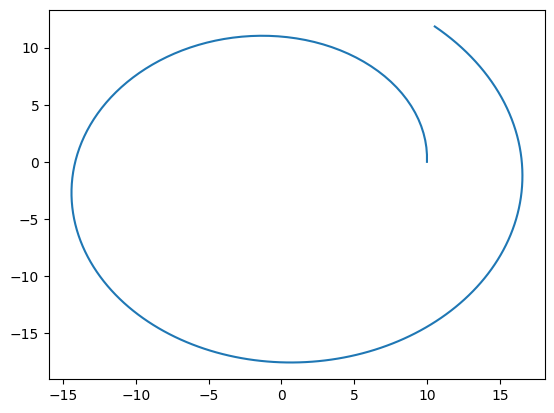

In [286]:
plt.plot(r[:,0],r[:,1])

In [300]:
def orbit_solve (r0, v0, tmax, N, method = 'euler-romer'):
  G = 1.0
  M = 1.0
  r = np.zeros((N,2)) # N rows (time step), 2 columns (x- and y-components)
  v = np.zeros((N,2)) # same shape for v
  t = np.linspace(0.0, tmax, N)
  x0= r0
  y0= 0
  r[0]=[x0,y0]
  w = np.sqrt(1/r0)
  v[0]=[0,w]
  dt = tmax/100
  for i in range (0, N-1):
    a= (-r[i])/np.linalg.norm(r[i])**3
    v[i+1] = v[i] + a*dt
    r[i+1] = r[i] + (v[i] + a*dt)*dt

  return t , r , v


In [301]:
a,s,d=orbit_solve(10, 1 ,198.69176531592203 , 200, method =  'euler-cromer')

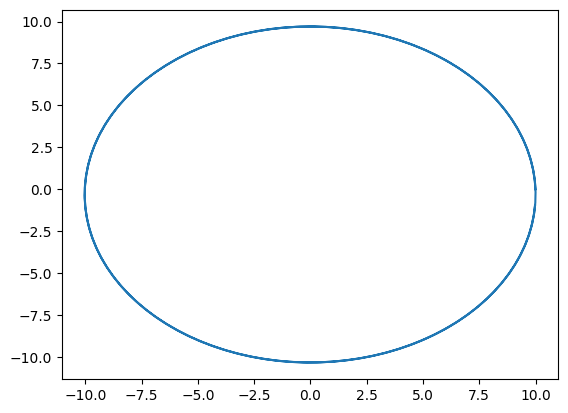

In [302]:
plt.plot(s[:,0],s[:,1])

In [290]:
def orbit_solve (r0, v0, tmax, N, method = 'verlet'):
  G = 1.0
  M = 1.0
  r = np.zeros((N,2)) # N rows (time step), 2 columns (x- and y-components)
  v = np.zeros((N,2)) # same shape for v
  a = np.zeros((N,2))
  t = np.linspace(0.0, tmax, N)
  x0= r0
  y0= 0
  r[0]=[x0,y0]
  w = np.sqrt(1/r0)
  v[0]=[0,w]
  dt = tmax/100
  a[0] = (-r[0])/np.linalg.norm(r[0])**3
  for i in range (0, N-1):
    a[i+1]= (-r[i])/np.linalg.norm(r[i])**3
    r[i+1] = r[i] + v[i] * dt + 0.5 * a[i] * (dt**2)
    v[i+1] = v[i] + 0.5 * ( a[i] + ((-r[i])/np.linalg.norm(r[i])**3))*dt


  return t , r , v

In [296]:
z,x,m=orbit_solve(10, 1 ,198.69176531592203 , 200, method = 'verlet')

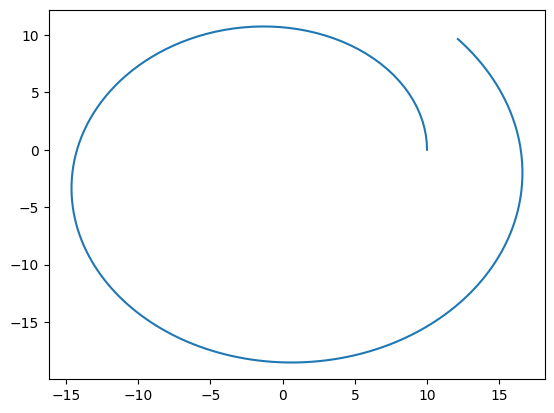

In [297]:
plt.plot(x[:,0],x[:,1])

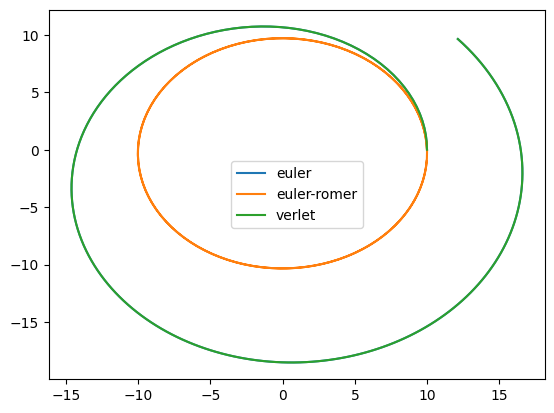

In [306]:
plt.plot(r[:,0],r[:,1], label='euler')
plt.plot(s[:,0],s[:,1], label= 'euler-romer')
plt.plot(x[:,0],x[:,1], label= 'verlet')
plt.legend()